In [68]:
# !pip install -r ../requirements.txt --upgrade -q

In [116]:
import os
import sys

from pathlib import Path

PROJECT_PATH = os.path.abspath('..')
sys.path.append(PROJECT_PATH)


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm


from bioinfokit.analys import stat
from IPython.display import display, Markdown
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import normaltest
from statsmodels.formula.api import ols



pd.options.display.max_columns = 500
default_figsize = (16, 5)
default_figsize_small = (16, 2.5)

dataset_path = Path(PROJECT_PATH) / 'data' / 'AmesHousing.csv'

In [117]:
# dicionario para mapeamento das colunas
nome_colunas_ptbr = {
    'Order': 'Ordem',
    'PID': 'IDPropriedade',
    'MS SubClass': 'SubClasseMS',
    'MS Zoning': 'ZoneamentoMS',
    'Lot Frontage': 'FrenteLote',
    'Lot Area': 'AreaLote',
    'Street': 'Rua',
    'Alley': 'Beco',
    'Lot Shape': 'FormaLote',
    'Land Contour': 'ContornoTerreno',
    'Utilities': 'Utilidades',
    'Lot Config': 'ConfiguracaoLote',
    'Land Slope': 'DecliveTerreno',
    'Neighborhood': 'Bairro',
    'Condition 1': 'Condicao1',
    'Condition 2': 'Condicao2',
    'Bldg Type': 'TipoConstrucao',
    'House Style': 'EstiloCasa',
    'Overall Qual': 'QualidadeGeral',
    'Overall Cond': 'CondicaoGeral',
    'Year Built': 'AnoConstrucao',
    'Year Remod/Add': 'AnoRemodelacao',
    'Roof Style': 'EstiloTelhado',
    'Roof Matl': 'MaterialTelhado',
    'Exterior 1st': 'Exterior1',
    'Exterior 2nd': 'Exterior2',
    'Mas Vnr Type': 'TipoRevestimento',
    'Mas Vnr Area': 'AreaRevestimento',
    'Exter Qual': 'QualidadeExterior',
    'Exter Cond': 'CondicaoExterior',
    'Foundation': 'Fundacao',
    'Bsmt Qual': 'QualidadePorao',
    'Bsmt Cond': 'CondicaoPorao',
    'Bsmt Exposure': 'ExposicaoPorao',
    'BsmtFin Type 1': 'TipoAcabamentoPorao1',
    'BsmtFin SF 1': 'AreaAcabamentoPorao1',
    'BsmtFin Type 2': 'TipoAcabamentoPorao2',
    'BsmtFin SF 2': 'AreaAcabamentoPorao2',
    'Bsmt Unf SF': 'AreaNaoAcabamentoPorao',
    'Total Bsmt SF': 'AreaTotalPorao',
    'Heating': 'Aquecimento',
    'Heating QC': 'QualidadeAquecimento',
    'Central Air': 'ArCentral',
    'Electrical': 'Eletrica',
    '1st Flr SF': 'Area1Andar',
    '2nd Flr SF': 'Area2Andar',
    'Low Qual Fin SF': 'AreaAcabamentoBaixaQualidade',
    'Gr Liv Area': 'AreaHabitavel',
    'Bsmt Full Bath': 'BanheirosCompletosPorao',
    'Bsmt Half Bath': 'BanheirosMeiaPorao',
    'Full Bath': 'BanheirosCompletos',
    'Half Bath': 'BanheirosMeia',
    'Bedroom AbvGr': 'Quartos',
    'Kitchen AbvGr': 'Cozinhas',
    'Kitchen Qual': 'QualidadeCozinha',
    'TotRms AbvGrd': 'TotalComodos',
    'Functional': 'Funcionalidade',
    'Fireplaces': 'Lareiras',
    'Fireplace Qu': 'QualidadeLareira',
    'Garage Type': 'TipoGaragem',
    'Garage Yr Blt': 'AnoConstrucaoGaragem',
    'Garage Finish': 'AcabamentoGaragem',
    'Garage Cars': 'CarrosGaragem',
    'Garage Area': 'AreaGaragem',
    'Garage Qual': 'QualidadeGaragem',
    'Garage Cond': 'CondicaoGaragem',
    'Paved Drive': 'EntradaPavimentada',
    'Wood Deck SF': 'AreaDeckMadeira',
    'Open Porch SF': 'AreaVarandaAberta',
    'Enclosed Porch': 'AreaVarandaFechada',
    '3Ssn Porch': 'AreaVaranda3Estacoes',
    'Screen Porch': 'AreaVarandaTela',
    'Pool Area': 'AreaPiscina',
    'Pool QC': 'QualidadePiscina',
    'Fence': 'Cerca',
    'Misc Feature': 'CaracteristicaExtra',
    'Misc Val': 'ValorExtra',
    'Mo Sold': 'MesVenda',
    'Yr Sold': 'AnoVenda',
    'Sale Type': 'TipoVenda',
    'Sale Condition': 'CondicaoVenda',
    'SalePrice': 'PrecoVenda'
}

# Dicionário para armazenar a descrição das colunas
descricao_colunas = {}

# Itera pelas colunas do DataFrame
for coluna in nome_colunas_ptbr:

    # Criar uma descrição concisa e informativa da coluna
    if coluna == 'Ordem':
        descricao = 'Número da linha no arquivo de dados (numérico - inteiro).'
    elif coluna == 'IDPropriedade':
        descricao = 'Identificador único da propriedade (numérico - inteiro).'
    elif coluna == 'SubClasseMS':
        descricao = 'Código numérico para o tipo de moradia (numérico - inteiro).'
    elif coluna == 'ZoneamentoMS':
        descricao = 'Classificação geral de zoneamento da propriedade (categórico - nominal).'
    elif coluna == 'FrenteLote':
        descricao = 'Pés lineares da rua conectada à propriedade (numérico - inteiro).'
    elif coluna == 'AreaLote':
        descricao = 'Tamanho do lote em pés quadrados (numérico - inteiro).'
    elif coluna == 'Rua':
        descricao = 'Tipo de rua de acesso à propriedade (categórico - nominal).'
    elif coluna == 'Beco':
        descricao = 'Tipo de acesso ao beco (categórico - nominal).'
    elif coluna == 'FormaLote':
        descricao = 'Formato geral da propriedade (categórico - ordinal).'
    elif coluna == 'ContornoTerreno':
        descricao = 'Planicidade do terreno (categórico - ordinal).'
    elif coluna == 'Utilidades':
        descricao = 'Tipo de utilitários disponíveis (categórico - ordinal).'
    elif coluna == 'ConfiguracaoLote':
        descricao = 'Configuração do lote (categórico - nominal).'
    elif coluna == 'DecliveTerreno':
        descricao = 'Inclinação do terreno (categórico - ordinal).'
    elif coluna == 'Bairro':
        descricao = 'Bairro físico dentro dos limites da cidade de Ames (categórico - nominal).'
    elif coluna == 'Condicao1':
        descricao = 'Proximidade a várias condições (categórico - nominal).'
    elif coluna == 'Condicao2':
        descricao = 'Proximidade a várias condições (se houver mais de uma) (categórico - nominal).'
    elif coluna == 'TipoConstrucao':
        descricao = 'Tipo de moradia (categórico - nominal).'
    elif coluna == 'EstiloCasa':
        descricao = 'Estilo da moradia (categórico - nominal).'
    elif coluna == 'QualidadeGeral':
        descricao = 'Qualidade geral do material e do acabamento (categórico - ordinal).'
    elif coluna == 'CondicaoGeral':
        descricao = 'Avaliação geral da condição (categórico - ordinal).'
    elif coluna == 'AnoConstrucao':
        descricao = 'Ano original de construção (numérico - inteiro).'
    elif coluna == 'AnoRemodelacao':
        descricao = 'Ano de remodelação (igual à data de construção se não houver remodelação ou adições) (numérico - inteiro).'
    elif coluna == 'EstiloTelhado':
        descricao = 'Tipo de telhado (categórico - nominal).'
    elif coluna == 'MaterialTelhado':
        descricao = 'Tipo de cobertura do telhado (categórico - nominal).'
    elif coluna == 'Exterior1':
        descricao = 'Tipo de revestimento exterior (categórico - nominal).'
    elif coluna == 'Exterior2':
        descricao = 'Tipo de revestimento exterior (se houver mais de um material) (categórico - nominal).'
    elif coluna == 'TipoRevestimento':
        descricao = 'Tipo de revestimento de alvenaria (categórico - nominal).'
    elif coluna == 'AreaRevestimento':
        descricao = 'Área de revestimento de alvenaria em pés quadrados (numérico - inteiro).'
    elif coluna == 'QualidadeExterior':
        descricao = 'Qualidade do material exterior (categórico - ordinal).'
    elif coluna == 'CondicaoExterior':
        descricao = 'Condição atual do material no exterior (categórico - ordinal).'
    elif coluna == 'Fundacao':
        descricao = 'Tipo de fundação (categórico - nominal).'
    elif coluna == 'QualidadePorao':
        descricao = 'Altura do porão (categórico - ordinal).'
    elif coluna == 'CondicaoPorao':
        descricao = 'Condição geral do porão (categórico - ordinal).'
    elif coluna == 'ExposicaoPorao':
        descricao = 'Paredes de porão de nível de caminhada ou jardim (categórico - ordinal).'
    elif coluna == 'TipoAcabamentoPorao1':
        descricao = 'Qualidade do acabamento da área acabada do porão (categórico - ordinal).'
    elif coluna == 'AreaAcabamentoPorao1':
        descricao = 'Pés quadrados acabados do tipo 1 (numérico - inteiro).'
    elif coluna == 'TipoAcabamentoPorao2':
        descricao = 'Qualidade do acabamento da segunda área acabada (se houver) (categórico - ordinal).'
    elif coluna == 'AreaAcabamentoPorao2':
        descricao = 'Pés quadrados acabados do tipo 2 (numérico - inteiro).'
    elif coluna == 'AreaNaoAcabamentoPorao':
        descricao = 'Pés quadrados inacabados da área do porão (numérico - inteiro).'
    elif coluna == 'AreaTotalPorao':
        descricao = 'Pés quadrados totais da área do porão (numérico - inteiro).'
    elif coluna == 'Aquecimento':
        descricao = 'Tipo de sistema de aquecimento (categórico - nominal).'
    elif coluna == 'QualidadeAquecimento':
        descricao = 'Qualidade do sistema de aquecimento (categórico - ordinal).'
    elif coluna == 'ArCentral':
        descricao = 'Ar condicionado central (categórico - binário).'
    elif coluna == 'Eletrica':
        descricao = 'Sistema elétrico (categórico - ordinal).'
    elif coluna == 'Area1Andar':
        descricao = 'Pés quadrados do primeiro andar (numérico - inteiro).'
    elif coluna == 'Area2Andar':
        descricao = 'Pés quadrados do segundo andar (numérico - inteiro).'
    elif coluna == 'AreaAcabamentoBaixaQualidade':
        descricao = 'Pés quadrados acabados de baixa qualidade (todos os andares) (numérico - inteiro).'
    elif coluna == 'AreaHabitavel':
        descricao = 'Pés quadrados de área habitável acima do nível do solo (numérico - inteiro).'
    elif coluna == 'BanheirosCompletosPorao':
        descricao = 'Banheiros completos no porão (numérico - inteiro).'
    elif coluna == 'BanheirosMeiaPorao':
        descricao = 'Banheiros de meia no porão (numérico - inteiro).'
    elif coluna == 'BanheirosCompletos':
        descricao = 'Banheiros completos acima do nível do solo (numérico - inteiro).'
    elif coluna == 'BanheirosMeia':
        descricao = 'Banheiros de meia acima do nível do solo (numérico - inteiro).'
    elif coluna == 'Quartos':
        descricao = 'Número de quartos acima do nível do solo (numérico - inteiro).'
    elif coluna == 'Cozinhas':
        descricao = 'Número de cozinhas (numérico - inteiro).'
    elif coluna == 'QualidadeCozinha':
        descricao = 'Qualidade da cozinha (categórico - ordinal).'
    elif coluna == 'TotalComodos':
        descricao = 'Número total de cômodos acima do nível do solo (não inclui banheiros) (numérico - inteiro).'
    elif coluna == 'Funcionalidade':
        descricao = 'Classificação da funcionalidade da casa (categórico - ordinal).'
    elif coluna == 'Lareiras':
        descricao = 'Número de lareiras (numérico - inteiro).'
    elif coluna == 'QualidadeLareira':
        descricao = 'Qualidade da lareira (categórico - ordinal).'
    elif coluna == 'TipoGaragem':
        descricao = 'Localização da garagem (categórico - nominal).'
    elif coluna == 'AnoConstrucaoGaragem':
        descricao = 'Ano de construção da garagem (numérico - inteiro).'
    elif coluna == 'AcabamentoGaragem':
        descricao = 'Acabamento interior da garagem (categórico - ordinal).'
    elif coluna == 'CarrosGaragem':
        descricao = 'Tamanho da garagem em capacidade de carros (numérico - inteiro).'
    elif coluna == 'AreaGaragem':
        descricao = 'Tamanho da garagem em pés quadrados (numérico - inteiro).'
    elif coluna == 'QualidadeGaragem':
        descricao = 'Qualidade da garagem (categórico - ordinal).'
    elif coluna == 'CondicaoGaragem':
        descricao = 'Condição da garagem (categórico - ordinal).'
    elif coluna == 'EntradaPavimentada':
        descricao = 'Entrada pavimentada (categórico - ordinal).'
    elif coluna == 'AreaDeckMadeira':
        descricao = 'Área do deck de madeira em pés quadrados (numérico - inteiro).'
    elif coluna == 'AreaVarandaAberta':
        descricao = 'Área da varanda aberta em pés quadrados (numérico - inteiro).'
    elif coluna == 'AreaVarandaFechada':
        descricao = 'Área da varanda fechada em pés quadrados (numérico - inteiro).'
    elif coluna == 'AreaVaranda3Estacoes':
        descricao = 'Área da varanda de 3 estações em pés quadrados (numérico - inteiro).'
    elif coluna == 'AreaVarandaTela':
        descricao = 'Área da varanda de tela em pés quadrados (numérico - inteiro).'
    elif coluna == 'AreaPiscina':
        descricao = 'Área da piscina em pés quadrados (numérico - inteiro).'
    elif coluna == 'QualidadePiscina':
        descricao = 'Qualidade da piscina (categórico - ordinal).'
    elif coluna == 'Cerca':
        descricao = 'Qualidade da cerca (categórico - ordinal).'
    elif coluna == 'CaracteristicaExtra':
        descricao = 'Característica extra (categórico - nominal).'
    elif coluna == 'ValorExtra':
        descricao = 'Valor da característica extra (numérico - inteiro).'
    elif coluna == 'MesVenda':
        descricao = 'Mês em que a casa foi vendida (numérico - inteiro).'
    elif coluna == 'AnoVenda':
        descricao = 'Ano em que a casa foi vendida (numérico - inteiro).'
    elif coluna == 'TipoVenda':
        descricao = 'Tipo de venda (categórico - nominal).'
    elif coluna == 'CondicaoVenda':
        descricao = 'Condição da venda (categórico - nominal).'
    elif coluna == 'PrecoVenda':
        descricao = 'Preço de venda (numérico - inteiro).'
    else:
        descricao = 'Descrição não disponível.'

    # Adicionar a descrição ao dicionário
    descricao_colunas[coluna] = descricao

df = pd.read_csv(dataset_path)
df = df.rename(columns=nome_colunas_ptbr)
df.head()

,Ordem,IDPropriedade,SubClasseMS,ZoneamentoMS,FrenteLote,AreaLote,Rua,Beco,FormaLote,ContornoTerreno,Utilidades,ConfiguracaoLote,DecliveTerreno,Bairro,Condicao1,Condicao2,TipoConstrucao,EstiloCasa,QualidadeGeral,CondicaoGeral,AnoConstrucao,AnoRemodelacao,EstiloTelhado,MaterialTelhado,Exterior1,Exterior2,TipoRevestimento,AreaRevestimento,QualidadeExterior,CondicaoExterior,Fundacao,QualidadePorao,CondicaoPorao,ExposicaoPorao,TipoAcabamentoPorao1,AreaAcabamentoPorao1,TipoAcabamentoPorao2,AreaAcabamentoPorao2,AreaNaoAcabamentoPorao,AreaTotalPorao,Aquecimento,QualidadeAquecimento,ArCentral,Eletrica,Area1Andar,Area2Andar,AreaAcabamentoBaixaQualidade,AreaHabitavel,BanheirosCompletosPorao,BanheirosMeiaPorao,BanheirosCompletos,BanheirosMeia,Quartos,Cozinhas,QualidadeCozinha,TotalComodos,Funcionalidade,Lareiras,QualidadeLareira,TipoGaragem,AnoConstrucaoGaragem,AcabamentoGaragem,CarrosGaragem,AreaGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,AreaDeckMadeira,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaVarandaTela,AreaPiscina,QualidadePiscina,Cerca,CaracteristicaExtra,ValorExtra,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Análise Exploratória do Dados

## Preço de Venda

In [118]:
df_preco_venda = df['PrecoVenda'].describe().to_frame().T
nulos = df['PrecoVenda'].isna().sum()

# exibir a d3escritiva e nulos
display(df_preco_venda)

# escrever uma pequena análise a respeito 
display(Markdown(f"""
O preço de venda das propriedades varia de R\\${df['PrecoVenda'].min()} a R\\${df['PrecoVenda'].max()}, com uma média de R\\${df['PrecoVenda'].mean():,.2f} e mediana de R\\${df['PrecoVenda'].median():,.2f}.
O desvio padrão é de R\\${df['PrecoVenda'].std():,.2f}.
Não existem valores nulos.
"""))



,count,mean,std,min,25%,50%,75%,max
PrecoVenda,2930.0,180796.060068,79886.692357,12789.0,129500.0,160000.0,213500.0,755000.0



O preço de venda das propriedades varia de R\$12789 a R\$755000, com uma média de R\$180,796.06 e mediana de R\$160,000.00.
O desvio padrão é de R\$79,886.69.
Não existem valores nulos.


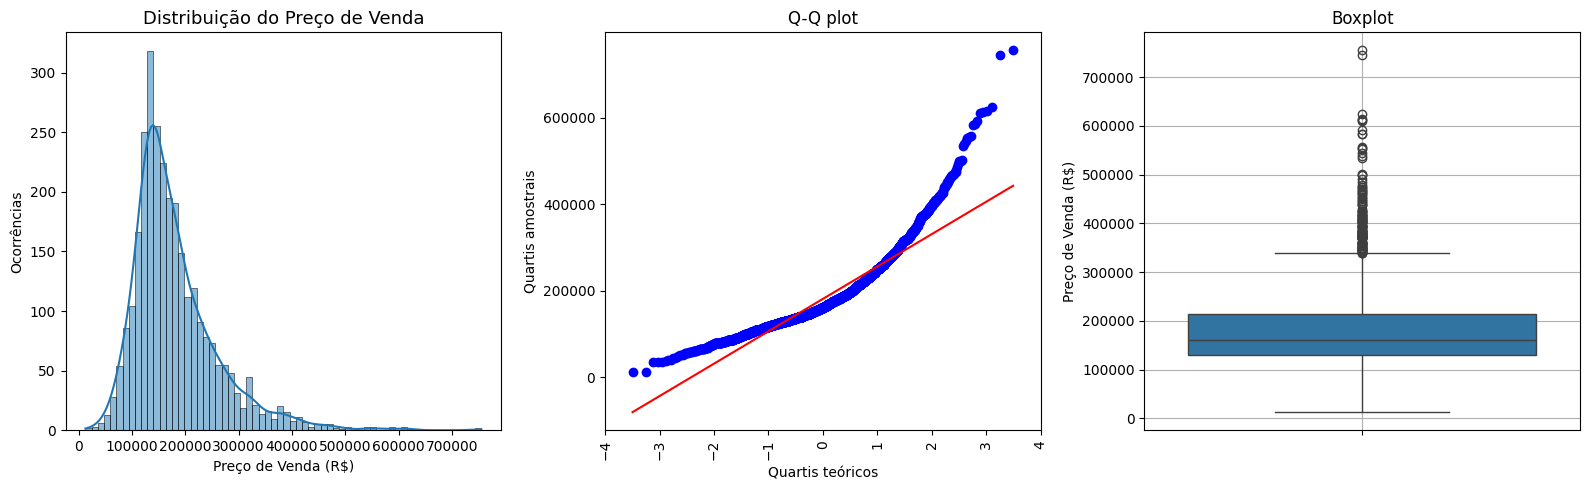

Shapiro-Wilk para a distribuição original:
Estatística=0.876, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)


In [119]:
plt.figure(figsize=default_figsize)

# Subplot 1: histograma
plt.subplot(1, 3, 1)
sns.histplot(df['PrecoVenda'], kde=True)
plt.title(r'Distribuição do Preço de Venda', fontsize=13)
plt.xlabel(r"Preço de Venda (R$)")
plt.ylabel('Ocorrências')

# Subplot 2: QQ-plot
plt.subplot(1, 3, 2)
stats.probplot(df['PrecoVenda'], dist="norm", plot=plt)
plt.xticks(ticks=np.arange(-4, 5, 1))
# girar xaxis
plt.xticks(rotation=90)
plt.title('Q-Q plot')
plt.xlabel('Quartis teóricos')
plt.ylabel('Quartis amostrais')

# Subplot 3: Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y=df['PrecoVenda'])
plt.title('Boxplot')
plt.ylabel('Preço de Venda (R$)')
plt.xlabel('')
plt.grid(True)

plt.tight_layout()
plt.show()

# Teste de Shapiro-Wilk 
s, p = shapiro(df['PrecoVenda'])
print('Shapiro-Wilk para a distribuição original:')
print('Estatística=%.3f, p=%.3f' % (s, p))
alpha = 0.05
if p > alpha:
    print('Amostra parece ser normalmente distribuída (falha em rejeitar H0)')
else:
    print('Amostra não parece ser normalmente distribuída (rejeita H0)')

## Bairro

In [107]:
df_bairros_counts = df['Bairro'].value_counts(dropna=False).to_frame().rename(columns={'count':'Ocorrências'})
nulos = df['Bairro'].isna().sum()

top = 5
top_perc = df_bairros_counts[:top].sum().iloc[0]/df_bairros_counts.sum().iloc[0]

top_bairros = list(df_bairros_counts[:top].index)
total_sales_top_perc = df[df['Bairro'].isin(top_bairros)]['PrecoVenda'].sum()/df['PrecoVenda'].sum()

# exibir a descritiva
display(Markdown(f"""
**Tipo de Variável**: Categórica
"""))

display(Markdown(f"""
**Ocorrências por Bairro**
"""))
display(df_bairros_counts)

# escrever uma pequena análise a respeito
display(Markdown(f"""
O bairro com maior número de ocorrências é **NAmes** com **443** registros.
Existem **28** bairros diferentes.
Existem **0** valores nulos.
Os top {top} bairros com maior número de ocorrências representam **{top_perc:.2%}** das observações e **{total_sales_top_perc:.2%}** dos valores negociados.
"""))


**Tipo de Variável**: Categórica



**Ocorrências por Bairro**


,Ocorrências
Bairro,
NAmes,443
CollgCr,267
OldTown,239
Edwards,194
Somerst,182
NridgHt,166
Gilbert,165
Sawyer,151
NWAmes,131



O bairro com maior número de ocorrências é **NAmes** com **443** registros.
Existem **28** bairros diferentes.
Existem **0** valores nulos.
Os top 5 bairros com maior número de ocorrências representam **45.22%** das observações e **40.58%** dos valores negociados.


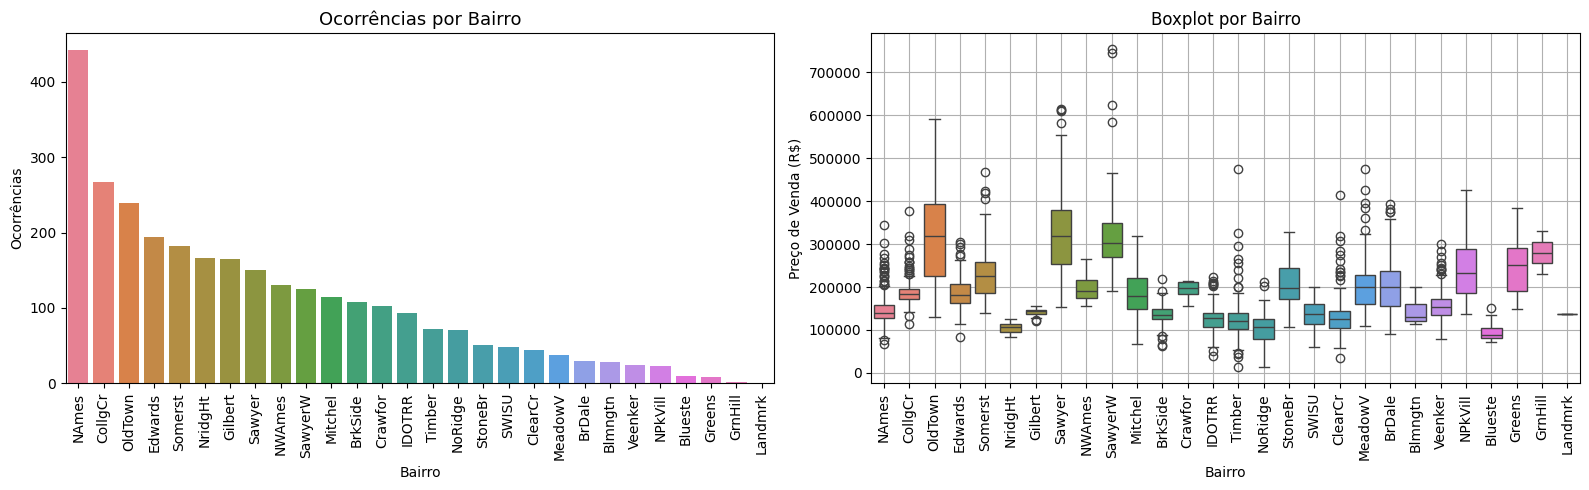

In [131]:
fig, ax = plt.subplots(1, 2, figsize=default_figsize)

# Subplot 1: histograma por bairro
plt.subplot(1, 2, 1)
sns.barplot(x='Bairro', y='Ocorrências', data=df_bairros_counts, ax=ax[0], hue='Bairro')
plt.title(r'Ocorrências por Bairro', fontsize=13)
plt.xlabel(r"Bairro")
plt.ylabel('Ocorrências')
plt.xticks(rotation=90)

# # Subplot 2: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='Bairro', y='PrecoVenda', data=df, ax=ax[1], hue='Bairro')
plt.title('Boxplot por Bairro')
plt.ylabel('Preço de Venda (R$)')
plt.xlabel('Bairro')
plt.xticks(ticks=range(len(df_bairros_counts.index)), labels=df_bairros_counts.index, rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

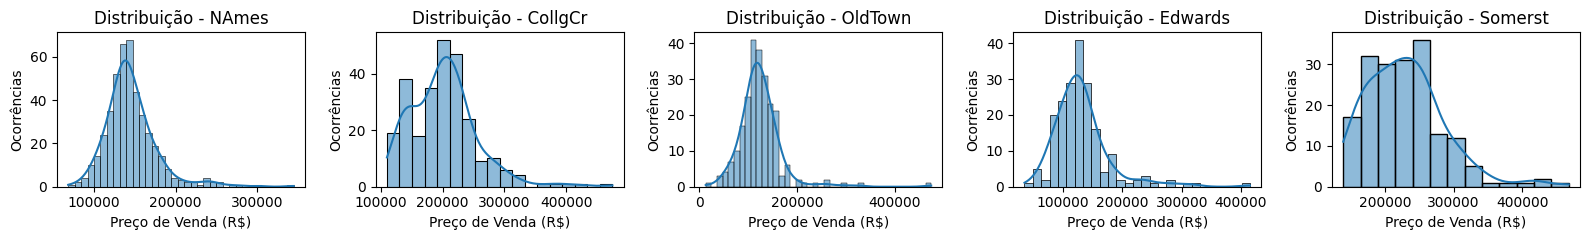

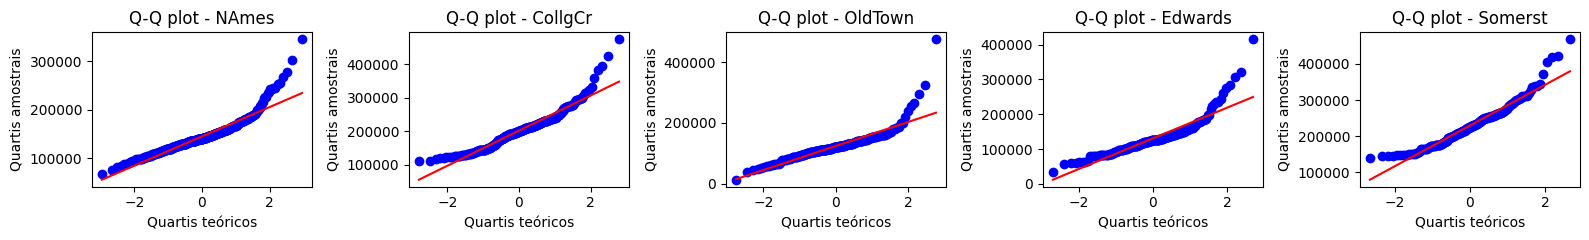

#### Shapiro - Bairros

Shapiro-Wilk para a distribuição do bairro NAmes:
Estatística=0.893, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição do bairro CollgCr:
Estatística=0.928, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição do bairro OldTown:
Estatística=0.800, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição do bairro Edwards:
Estatística=0.837, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição do bairro Somerst:
Estatística=0.939, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)


#### Kolmogorov-Smirnov - Bairros

Kolmogorov-Smirnov para a distribuição do bairro NAmes:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição do bairro CollgCr:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição do bairro OldTown:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição do bairro Edwards:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Kolmogorov-Smirnov para a distribuição do bairro Somerst:
Estatística=1.000, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)


In [140]:
# imprimir o histograma e distribuição de cada um dos top bairros selecionados
fig, ax = plt.subplots(1, 5, figsize=default_figsize_small)

for i, bairro in enumerate(top_bairros):
    plt.subplot(1, 5, i+1)
    sns.histplot(df[df['Bairro'] == bairro]['PrecoVenda'], kde=True)
    plt.title(f'Distribuição - {bairro}')
    plt.xlabel('Preço de Venda (R$)')
    plt.ylabel('Ocorrências')

plt.tight_layout()
plt.show()

# fazer o qq plot para cada um dos top bairros selecionados
fig, ax = plt.subplots(1, 5, figsize=default_figsize_small)

for i, bairro in enumerate(top_bairros):
    plt.subplot(1, 5, i+1)
    stats.probplot(df[df['Bairro'] == bairro]['PrecoVenda'], dist="norm", plot=plt)
    plt.title(f'Q-Q plot - {bairro}')
    plt.xlabel('Quartis teóricos')
    plt.ylabel('Quartis amostrais')

plt.tight_layout()
plt.show()

# Teste de Shapiro-Wilk para cada um dos top bairros selecionados
display(Markdown('#### Shapiro - Bairros'))
for bairro in top_bairros:
    s, p = shapiro(df[df['Bairro'] == bairro]['PrecoVenda'])
    print(f'Shapiro-Wilk para a distribuição do bairro {bairro}:')
    print(f'Estatística={s:.3f}, p={p:.3f}')
    alpha = 0.05
    if p > alpha:
        print('Amostra parece ser normalmente distribuída (falha em rejeitar H0)')
    else:
        print('Amostra não parece ser normalmente distribuída (rejeita H0)')


# Teste de Kolmogorov-Smirnov para cada um dos top bairros selecionados
display(Markdown('#### Kolmogorov-Smirnov - Bairros'))
for bairro in top_bairros:
    s, p = stats.kstest(df[df['Bairro'] == bairro]['PrecoVenda'], 'norm')
    print(f'Kolmogorov-Smirnov para a distribuição do bairro {bairro}:')
    print(f'Estatística={s:.3f}, p={p:.3f}')
    alpha = 0.05
    if p > alpha:
        print('Amostra parece ser normalmente distribuída (falha em rejeitar H0)')
    else:
        print('Amostra não parece ser normalmente distribuída (rejeita H0)')



In [133]:
# Melting the filtered data for analysis in the OLS model
melted_data_for_ols = pd.melt(df[df['Bairro'].isin(top_bairros)], id_vars=['Bairro'], value_vars=['PrecoVenda'])

# Ordinary Least Squares (OLS) model
model = ols('value ~ Bairro', data=melted_data_for_ols).fit()

# Performing ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Displaying the ANOVA table
anova_table

,sum_sq,df,F,PR(>F)
Bairro,1.917418e+12,4.0,230.898961,2.460468e-150
Residual,2.740367e+12,1320.0,NaN,NaN


In [134]:
res = stat()
res.anova_stat(df=melted_data_for_ols, res_var='value', anova_model='value ~ Bairro')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
Bairro,4.0,1.917418e+12,4.793544e+11,230.898961,2.460468e-150
Residual,1320.0,2.740367e+12,2.076035e+09,NaN,NaN


In [138]:
res.anova_model_out.resid

0       69902.650113
1      -40097.349887
2       26902.650113
3       98902.650113
4      -13707.324176
            ...     
1320    -5843.381443
1321   -14843.381443
1322   -47843.381443
1323   -95843.381443
1324    -9843.381443
Length: 1325, dtype: float64

In [139]:
res.anova_std_residuals

0       1.534180
1      -0.880032
2       0.590443
3       2.170654
4      -0.300840
          ...   
1320   -0.128247
1321   -0.325773
1322   -1.050037
1323   -2.103511
1324   -0.216036
Length: 1325, dtype: float64

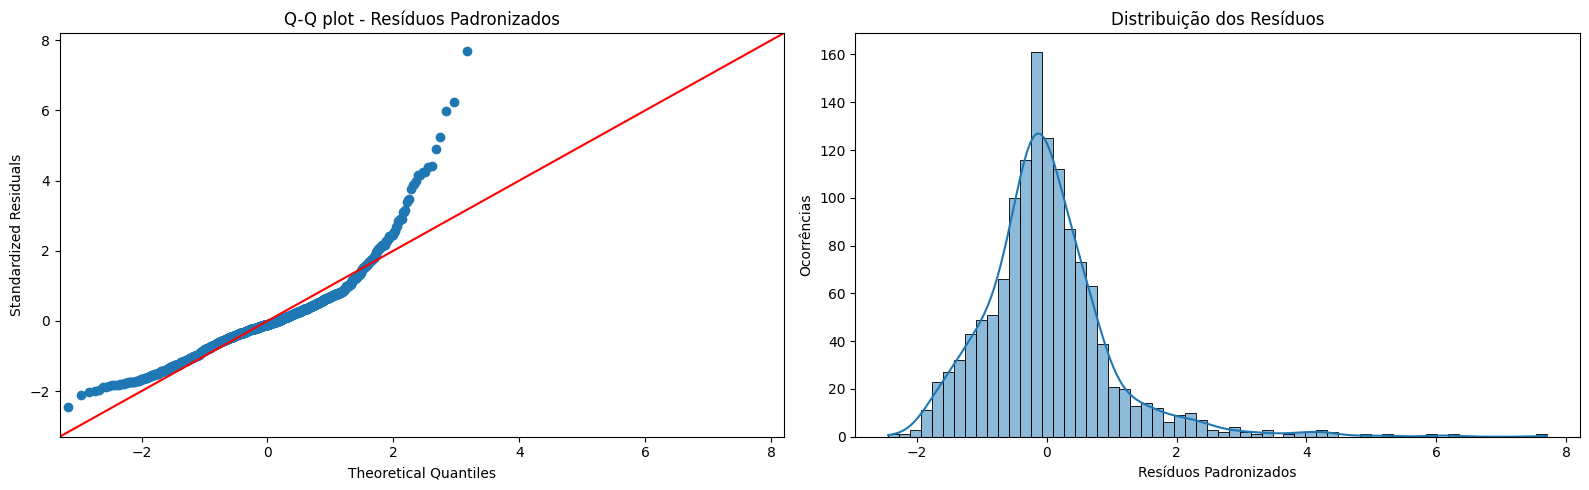

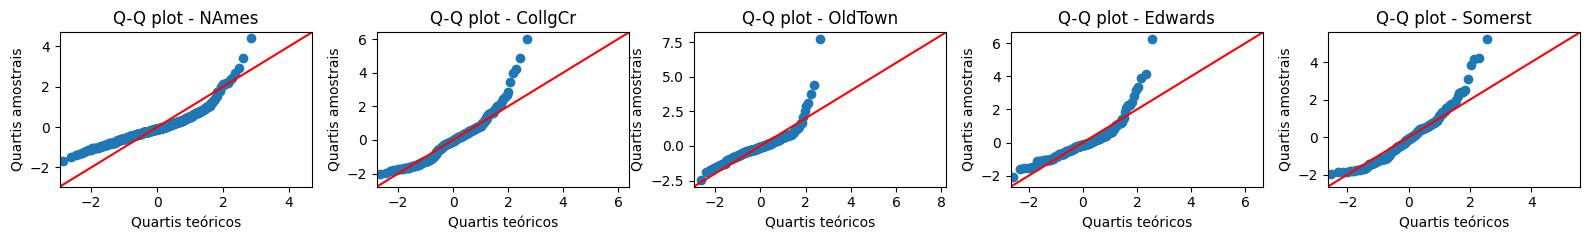

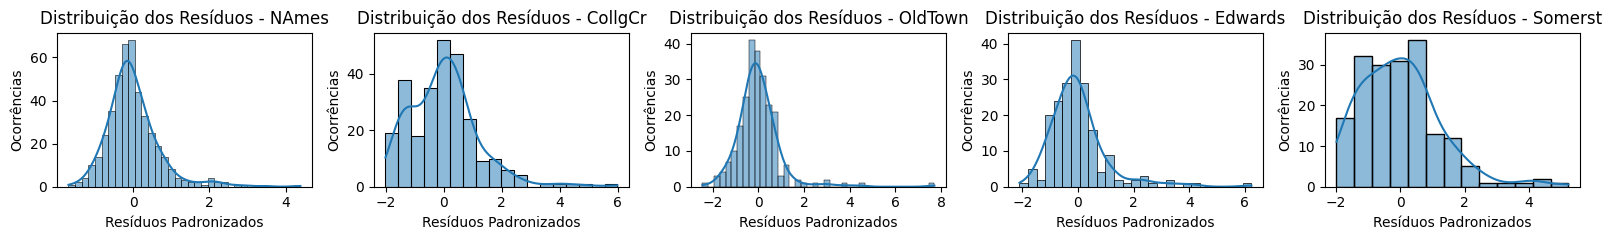

Shapiro-Wilk para a distribuição dos resíduos:
Estatística=0.892, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição dos resíduos do bairro NAmes:
Estatística=0.893, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição dos resíduos do bairro CollgCr:
Estatística=0.928, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição dos resíduos do bairro OldTown:
Estatística=0.800, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição dos resíduos do bairro Edwards:
Estatística=0.837, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)
Shapiro-Wilk para a distribuição dos resíduos do bairro Somerst:
Estatística=0.939, p=0.000
Amostra não parece ser normalmente distribuída (rejeita H0)


In [136]:
# 2 subplots Q-Q plot geral dos residuos e distribuição geral dos residuos
fig, ax = plt.subplots(1, 2, figsize=default_figsize)

# Q-Q plot dos resíduos
plt.subplot(1, 2, 1)
sm.qqplot(res.anova_std_residuals, line='45', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title("Q-Q plot - Resíduos Padronizados")

# Distribuição dos resíduos
plt.subplot(1, 2, 2)
sns.histplot(res.anova_std_residuals, kde=True, ax=ax[1])
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos Padronizados')
plt.ylabel('Ocorrências')

plt.tight_layout()
plt.show()

# qqplot dos resíduos para cada bairro
fig, ax = plt.subplots(1, 5, figsize=default_figsize_small)

for i, bairro in enumerate(top_bairros):
    plt.subplot(1, 5, i+1)
    sm.qqplot(res.anova_std_residuals[melted_data_for_ols['Bairro'] == bairro], line='45', ax=ax[i])
    plt.title(f'Q-Q plot - {bairro}')
    plt.xlabel('Quartis teóricos')
    plt.ylabel('Quartis amostrais')
plt.tight_layout()

# plotar a distribuição dos residuos para cada bairro
fig, ax = plt.subplots(1, 5, figsize=default_figsize_small)

for i, bairro in enumerate(top_bairros):
    plt.subplot(1, 5, i+1)
    sns.histplot(res.anova_std_residuals[melted_data_for_ols['Bairro'] == bairro], kde=True)
    plt.title(f'Distribuição dos Resíduos - {bairro}')
    plt.xlabel('Resíduos Padronizados')
    plt.ylabel('Ocorrências')
plt.tight_layout()

plt.show()


# Teste de Shapiro-Wilk para os resíduos
s, p = shapiro(res.anova_std_residuals)
print('Shapiro-Wilk para a distribuição dos resíduos:')
print('Estatística=%.3f, p=%.3f' % (s, p))
alpha = 0.05
if p > alpha:
    print('Amostra parece ser normalmente distribuída (falha em rejeitar H0)')
else:
    print('Amostra não parece ser normalmente distribuída (rejeita H0)')

# Teste de normalidade dos resíduos para cada bairro
for bairro in top_bairros:
    s, p = shapiro(res.anova_std_residuals[melted_data_for_ols['Bairro'] == bairro])
    print(f'Shapiro-Wilk para a distribuição dos resíduos do bairro {bairro}:')
    print(f'Estatística={s:.3f}, p={p:.3f}')
    alpha = 0.05
    if p > alpha:
        print('Amostra parece ser normalmente distribuída (falha em rejeitar H0)')
    else:
        print('Amostra não parece ser normalmente distribuída (rejeita H0)')


In [137]:
# Tukey's HSD test
df_top_bairros = df[df['Bairro'].isin(top_bairros)][['Bairro', 'PrecoVenda']].copy()
tukey_test = sm.stats.multicomp.pairwise_tukeyhsd(df_top_bairros['PrecoVenda'], df_top_bairros['Bairro'], alpha=0.05)
tukey_test.summary()
# dir(tukey_test)
# tukey_test.pvalues

group1,group2,meandiff,p-adj,lower,upper,reject
CollgCr,Edwards,-70960.053,0.0,-82701.4719,-59218.6341,True
CollgCr,NAmes,-56706.0846,0.0,-66348.7766,-47063.3926,True
CollgCr,OldTown,-77811.5432,0.0,-88894.287,-66728.7995,True
CollgCr,Somerst,27903.8897,0.0,15940.384,39867.3954,True
Edwards,NAmes,14253.9684,0.0027,3538.9332,24969.0037,True
Edwards,OldTown,-6851.4902,0.5261,-18878.8623,5175.8819,False
Edwards,Somerst,98863.9427,0.0,86020.4253,111707.4601,True
NAmes,OldTown,-21105.4587,0.0,-31094.3661,-11116.5512,True
NAmes,Somerst,84609.9743,0.0,73652.0306,95567.918,True
OldTown,Somerst,105715.433,0.0,93471.1596,117959.7064,True
